In [83]:
#@title Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor




In [84]:
#@title Data Frame
a =  data = pd.read_csv('https://www.datos.gov.co/api/views/96sh-4v8d/rows.csv?accessType=DOWNLOAD')

#@markdown se elimina el iso 99999 que no corresponde a ninguna pais y son datos que pueden afectar el data frame

df = a.drop(a[a['Codigo Iso 3166']==99999].index)

In [85]:
a[a['Codigo Iso 3166']==99999]

,Año,Mes,Nacionalidad,Codigo Iso 3166,Femenino,Masculino,Indefinido,Total,Latitud - Longitud
0,2012,Enero,Islas Alboran y Perejil,99999,1,0,NaN,1,"(4.697144,-74.140516)"
253,2012,Enero,Curazao,99999,0,1,NaN,1,"(4.697144,-74.140516)"
254,2012,Enero,Curazao,99999,1,0,NaN,1,"(6.171601,-75.427454)"
511,2012,Enero,Isla Johnston,99999,0,1,NaN,1,"(10.886611,-74.776708)"
512,2012,Enero,Isla Johnston,99999,0,1,NaN,1,"(4.697144,-74.140516)"
...,...,...,...,...,...,...,...,...,...
118342,2022,Junio,Palestina,99999,1,2,NaN,3,"(4.697144,-74.140516)"
118584,2022,Junio,Desconocido,99999,1,2,NaN,3,"(10.445761,-75.516429)"
118585,2022,Junio,Desconocido,99999,41,58,NaN,99,"(4.697144,-74.140516)"
118586,2022,Junio,Desconocido,99999,0,2,NaN,2,"(6.171601,-75.427454)"


In [103]:
#@title Codigo Iso
#@markdown Se organizan los nombres de las Nacionalidades

cod = df['Codigo Iso 3166'].unique()
for i in cod:
  ind = a[a['Codigo Iso 3166']==i].index
  nac = a["Nacionalidad"][ind[0]]
  df.loc[df['Codigo Iso 3166'] == i,'Nacionalidad']= nac


In [104]:
lon = df["Latitud - Longitud"].str.split(expand=True)
lon = lon[0].str.split('(', expand=True)
lon = lon[1].str.split(')', expand=True)
lon = lon[0].str.split(',', expand=True)
lon.columns = ['Latitud', 'Longitud']
lon = lon[['Longitud','Latitud']].astype(float)
df = pd.concat([df, lon], axis=1)
lon = df['Longitud'].value_counts().index[0] 
lat = df["Latitud"].value_counts().index[0]
df.Longitud.fillna(lon, inplace=True)
df.Latitud.fillna(lat, inplace=True)

In [87]:
df.head(10)

,Año,Mes,Nacionalidad,Codigo Iso 3166,Femenino,Masculino,Indefinido,Total,Latitud - Longitud
1,2012,Enero,Albania,8,1,2,NaN,3,"(4.697144,-74.140516)"
2,2012,Enero,Alemania,276,11,16,NaN,27,"(-4.197703,-69.941278)"
3,2012,Enero,Alemania,276,1,1,NaN,2,"(0.25129,-76.875963)"
4,2012,Enero,Alemania,276,63,102,NaN,165,"(0.814836,-77.662532)"
5,2012,Enero,Alemania,276,22,23,NaN,45,"(10.408582,-75.538003)"
6,2012,Enero,Alemania,276,27,48,NaN,75,"(10.445761,-75.516429)"
7,2012,Enero,Alemania,276,7,4,NaN,11,"(10.886611,-74.776708)"
8,2012,Enero,Alemania,276,1,1,NaN,2,"(11.247723,-74.213989)"
9,2012,Enero,Alemania,276,8,21,NaN,29,"(11.360009,-72.129330)"
10,2012,Enero,Alemania,276,6,7,NaN,13,"(12.586067,-81.702563)"


In [88]:
df.dtypes

Año                     int64
Mes                    object
Nacionalidad           object
Codigo Iso 3166         int64
Femenino                int64
Masculino               int64
Indefinido            float64
Total                   int64
Latitud - Longitud     object
dtype: object

In [102]:
print("Desviacion estandar:\n", df.std())
print("\n\n")
print("Promedio:\n", df.mean())

<ipython-input-102-cbb235e791db>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Desviacion estandar:\n", df.std())


Desviacion estandar:
 Año                   2.917766
Codigo Iso 3166     260.433955
Femenino            685.558253
Masculino           871.151670
Indefinido                 NaN
Total              1541.029515
dtype: float64



Promedio:
 Año                2016.581909
Codigo Iso 3166     428.098002
Femenino             93.048539
Masculino           130.660241
Indefinido                 NaN
Total               223.717222
dtype: float64


<ipython-input-102-cbb235e791db>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Promedio:\n", df.mean())


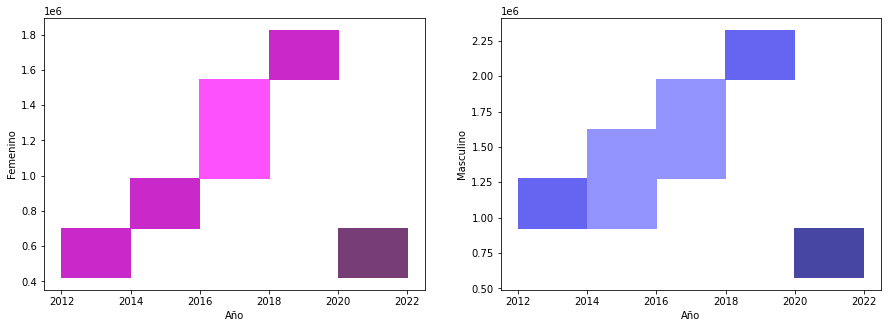

In [101]:
gr = df.groupby(["Año"]).sum().sort_values(by="Femenino",ascending=False)


#sns.catplot(data =gr, kind="bar", x = gr.index.values , y = gr.Masculino.values);
#sns.catplot(data =gr, kind="bar", x = gr.index.values , y = gr.Femenino.values);
plt.subplots(figsize=(15, 5))
plt.subplot(1,2,1)
sns.histplot(x=gr.index,y=gr.Femenino, color='purple')
plt.subplot(1,2,2)
sns.histplot(x=gr.index,y=gr.Masculino, color='blue')

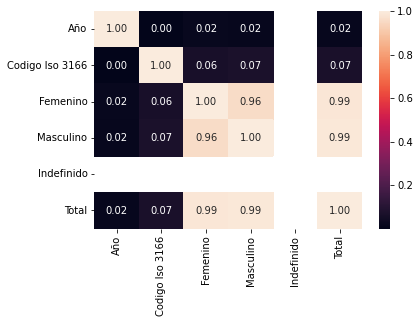

In [100]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

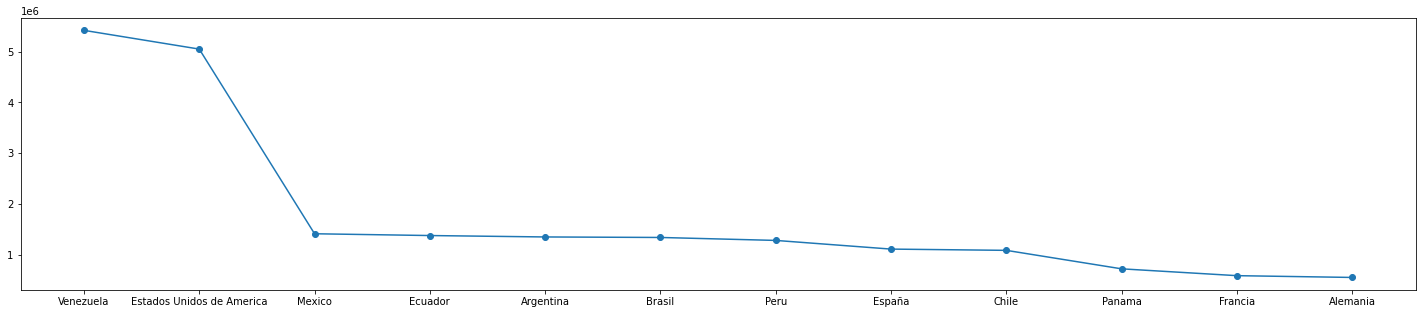

In [99]:
aa = df[["Nacionalidad","Total"]]
aa.head()
aa = aa.groupby(["Nacionalidad"]).sum().sort_values(by="Total",ascending=False)

plt.subplots(figsize=(25, 5))
plt.plot(aa.head(12).index,aa.head(12).Total)
plt.scatter(aa.head(12).index,aa.head(12).Total)
plt.show()

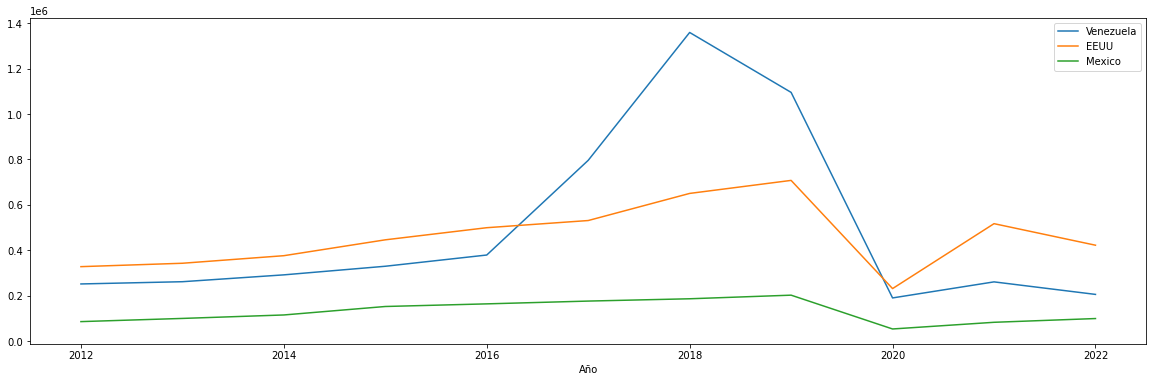

In [98]:
aa = df.groupby(["Nacionalidad","Año"]).Total.sum()
plt.subplots(figsize=(20, 6))
aa["Venezuela"].plot(x ='Año', label = "Venezuela")
aa["Estados Unidos de America"].plot(x ='Año', label = "EEUU")
aa["Mexico"].plot(x ='Año', label = "Mexico")
plt.legend()
plt.show()


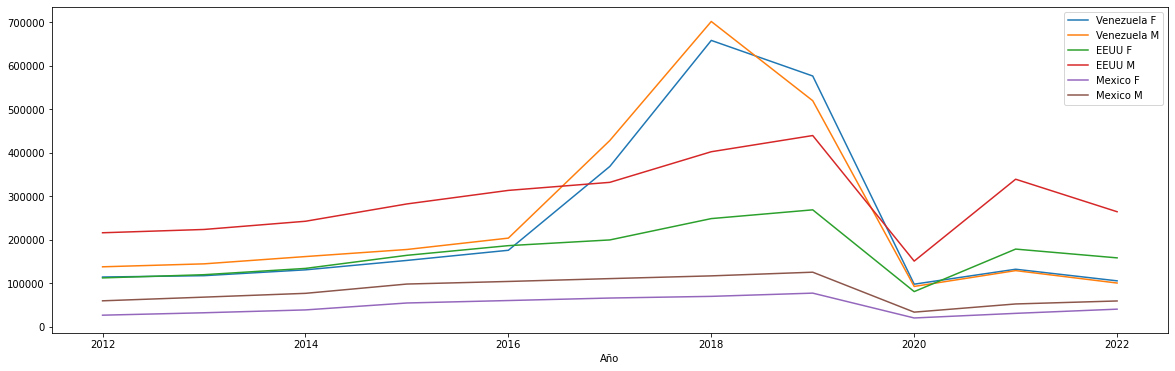

In [96]:
fem = df.groupby(["Nacionalidad","Año"]).Femenino.sum()
mas = df.groupby(["Nacionalidad","Año"]).Masculino.sum()
plt.subplots(figsize=(20, 6))
fem["Venezuela"].plot(x="Año", label = "Venezuela F")
mas["Venezuela"].plot(x="Año", label = "Venezuela M")
fem["Estados Unidos de America"].plot(x="Año", label = "EEUU F")
mas["Estados Unidos de America"].plot( x="Año",label = "EEUU M")
fem["Mexico"].plot(x="Año", label = "Mexico F")
mas["Mexico"].plot( x="Año",label = "Mexico M")
plt.legend()
plt.show()


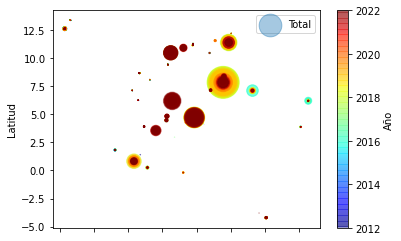

In [196]:

df.plot(kind="scatter", x="Longitud", y="Latitud", alpha=0.4, s=df["Total"]/80, 
             label="Total", c="Año", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()

In [106]:
#@title Ordenar DataFrame
#@markdown Se escogen las columnas deseadas y se crea una columna de clasificación
data = df.groupby(["Codigo Iso 3166","Año","Longitud","Latitud"]).sum()
data = data.drop(['Indefinido'], axis=1)
data.reset_index(inplace=True, drop=False)
data["Mayor"] = np.where(data['Femenino']>data['Masculino'], 1, 0)
data

,Codigo Iso 3166,Año,Longitud,Latitud,Femenino,Masculino,Total,Mayor
0,4,2012,-77.662532,0.814836,0,1,1,0
1,4,2012,-74.140516,4.697144,0,4,4,0
2,4,2013,-75.736532,4.815061,0,1,1,0
3,4,2013,-74.140516,4.697144,2,8,10,0
4,4,2014,-76.384584,3.541112,0,2,2,0
...,...,...,...,...,...,...,...,...
20512,887,2022,-74.140516,4.697144,0,7,7,0
20513,894,2022,-75.427454,6.171601,0,1,1,0
20514,894,2022,-74.140516,4.697144,2,1,3,1
20515,901,2022,-75.427454,6.171601,0,1,1,0


In [107]:

#@markdown Se particiona y se escogen los datos de entrnamiento y de testeo
data = df.groupby(["Codigo Iso 3166","Año","Longitud","Latitud"]).sum()
data = data.drop(['Indefinido'], axis=1)
data.reset_index(inplace=True, drop=False)
data["Mayor"] = np.where(data['Femenino']>data['Masculino'], 1, 0)

X = data.values[:,:-1]
y = data.values[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [108]:
#@title Gaussian NB
#@markdown se elimina el iso 99999 que no corresponde a ninguna pais y son datos que pueden afectar el data frame

est = GaussianNB()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))


0.8357699805068226


In [109]:
#@title Decision Tree classifier
est = DecisionTreeClassifier(max_depth=2)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9134990253411306


In [110]:
#@title trp - tnr

def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [111]:

est = DecisionTreeClassifier(max_depth=2)

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))


accuracy 0.907 (+/- 0.00574)
tpr      0.435 (+/- 0.02612)
tnr      1.000 (+/- 0.00000)


In [265]:
#@title Random Forest classifier (RFC)

est = RandomForestClassifier()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.011961722488038277


In [266]:

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.983 (+/- 0.00232)
tpr      0.902 (+/- 0.01778)
tnr      0.998 (+/- 0.00098)


In [114]:
#@title SVC

est = SVC()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.8362573099415205


In [115]:
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.837 (+/- 0.00469)
tpr      0.011 (+/- 0.00361)
tnr      1.000 (+/- 0.00000)


In [239]:
df1 = data.groupby('Año')['Total'].sum().reset_index()
X_train, X_test, y_train, y_test = train_test_split(df1['Año'], df1['Total'], test_size=0.2, random_state=42)
res = DecisionTreeRegressor(max_depth=15)
res.fit(X_train.values.reshape(-1, 1), y_train)


DecisionTreeRegressor(max_depth=15)

In [243]:
prediccion = res.predict([[2016]])

print('La cantidad de migrantes pronosticada para el año 2021 es:', prediccion)

La cantidad de inmigrantes pronosticada para el año 2021 es: [2696484.]


In [244]:
df2 = data.groupby(['Año','Codigo Iso 3166'])['Total'].sum().reset_index()
df2

,Año,Codigo Iso 3166,Total
0,2012,4,5
1,2012,8,44
2,2012,12,61
3,2012,16,2
4,2012,20,124
...,...,...,...
2082,2022,860,5
2083,2022,862,205413
2084,2022,887,9
2085,2022,894,4


In [268]:
X_train, X_test, y_train, y_test = train_test_split(df2[['Año','Codigo Iso 3166']], df2['Total'], test_size=0.2, random_state=21)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

s = cross_val_score(model, df2[['Año','Codigo Iso 3166']], df2['Total'], cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.034 (+/- 0.00829)
tpr      0.908 (+/- 0.01613)
tnr      0.998 (+/- 0.00047)
